In [1]:
import numpy as np
from SessionData import *
import matplotlib.pyplot as plt
import sys

### Populate SessionData

In [2]:
mouse_id = "7003"
session_id = "m4"
experiment = "clickbait-motivate"

print("=== Testing SessionData Class ===")
print(f"Loading data for {mouse_id}_{session_id}...")
    

data = SessionData(
    mouse_id=mouse_id,
    session_id=session_id,
    experiment=experiment,
    #base_path="S:\\clickbait-visual\\kilosorted",  # Adjust path as needed
    min_spikes=50,
    verbose=True)

=== Testing SessionData Class ===
Loading data for 7003_m4...
Successfully loaded spike_times from S:\clickbait-motivate\kilosorted\7003\m4\spike_times.npy
Successfully loaded spike_templates from S:\clickbait-motivate\kilosorted\7003\m4\spike_templates.npy
Successfully loaded templates from S:\clickbait-motivate\kilosorted\7003\m4\templates.npy
Successfully loaded sniff from S:\clickbait-motivate\preprocessed\7003\m4\sniff.npy
Loaded data: ['spike_times', 'spike_templates', 'templates', 'sniff']
Successfully loaded events from S:\clickbait-motivate\bonsai\7003\m4\events.csv
Loaded 25 clusters for 7003_m4
Loaded sniff data: 79752600 samples


Created population matrix: 25 neurons x 100 time bins
Time range: 500000.0 - 505000.0 ms
Bin size: 50 ms


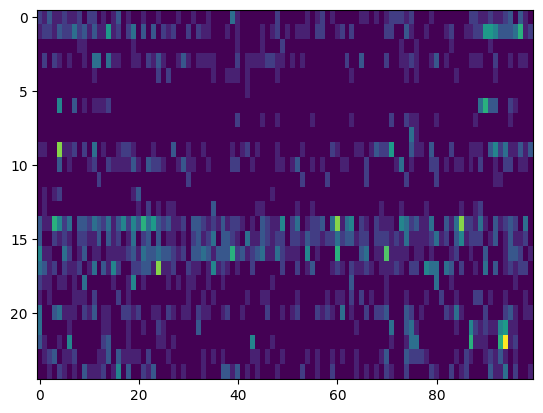

In [3]:
start_time=1000*500
end_time=start_time+5000 
bin_size_ms=50

pop_matrix, time_bins, included_clusters = data.create_population_raster(
    start_time=start_time,
    end_time=end_time, 
    bin_size_ms=bin_size_ms,
    zscore_neurons=False,
    cluster_ids=None
)

plt.imshow(pop_matrix, aspect='auto')

In [4]:
data.clusters[0]

{'cluster_id': 0,
 'best_channel': 6,
 'spike_times': array([4.37333333e+01, 1.59833333e+02, 1.87200000e+02, ...,
        2.65809913e+06, 2.65812307e+06, 2.65819360e+06]),
 'waveform_template': array([ 0.28861856,  0.26173478,  0.23846416,  0.23022673,  0.23131864,
         0.23709437,  0.23753296,  0.23847625,  0.25059214,  0.29423973,
         0.35021082,  0.35770398,  0.31965292,  0.3488928 ,  0.60427773,
         0.9528359 ,  0.8796686 , -0.1435194 , -2.0953279 , -4.066431  ,
        -4.924556  , -4.321446  , -2.9138064 , -1.5986917 , -0.7969649 ,
        -0.31735605,  0.06649643,  0.46182412,  0.790745  ,  0.9333606 ,
         0.9147099 ,  0.84767956,  0.81718755,  0.8198364 ,  0.8179962 ,
         0.8069118 ,  0.782804  ,  0.7686859 ,  0.75172883,  0.7236273 ,
         0.6758159 ,  0.61242086,  0.551364  ,  0.48582187,  0.41396514,
         0.34393606,  0.28136933,  0.22713013,  0.1819937 ,  0.1366732 ,
         0.08817291,  0.02715777, -0.0364171 , -0.08051974, -0.10265702,
    

### Sniff

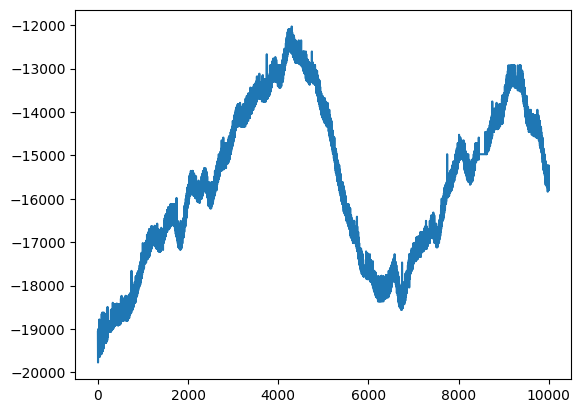

In [5]:
plt.plot(data.sniff[start_time+20000:start_time+30000:1])

### PCA

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA(n_components=5)

scaled_data = scaler.fit_transform(pop_matrix[:,:])
scores = pca.fit_transform(scaled_data.T)

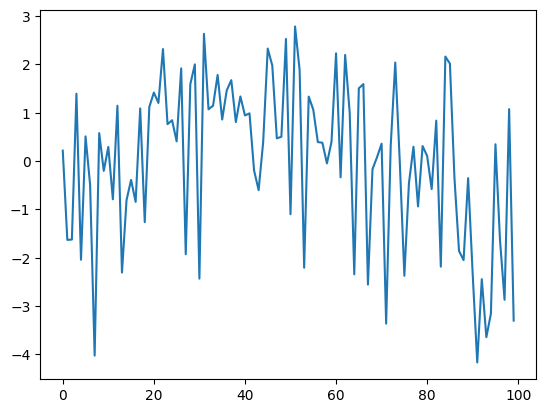

In [7]:
plt.plot(scores[:,0])

In [8]:
hc_data = data.filter_clusters('best_channel <= 16')
ob_data = data.filter_clusters('best_channel > 16')

Filtered from 25 to 19 clusters using: best_channel <= 16
Filtered from 25 to 6 clusters using: best_channel > 16


In [35]:
hc_data.events

,trial_number,timestamp,poke_left,poke_right,centroid_x,centroid_y,target_cell,iti,water_left,water_right,reward_state,click,flip_state,speed,direction,drinking,timestamp_ms
0,0,2025-06-25 14:03:50.053529600,False,False,87,1059,12.0,False,True,False,False,False,False,0.000000,0.000000,False,19213
1,0,2025-06-25 14:03:50.088512000,False,False,87,1058,12.0,False,True,False,False,False,False,1.000000,1.570796,False,19247
2,0,2025-06-25 14:03:50.112576000,False,False,87,1058,12.0,False,True,False,False,False,False,0.000000,0.000000,False,19280
3,0,2025-06-25 14:03:50.133427200,False,False,86,1058,12.0,False,True,False,False,False,False,1.000000,0.000000,False,19313
4,0,2025-06-25 14:03:50.152921600,False,False,86,1058,12.0,False,True,False,False,False,False,0.000000,0.000000,False,19347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78961,45,2025-06-25 14:47:44.893299200,False,False,632,1682,NaN,False,True,False,False,False,False,2.236068,0.000015,False,2651239
78962,45,2025-06-25 14:47:44.997990400,False,False,632,1681,NaN,False,True,False,False,False,False,1.000000,1.570796,False,2651273
78963,45,2025-06-25 14:47:45.093145600,False,False,631,1681,NaN,False,True,False,False,False,False,1.000000,0.000000,False,2651306
78964,45,2025-06-25 14:47:45.193510400,False,False,629,1682,NaN,False,True,False,False,False,False,2.236068,0.000015,False,2651339


In [38]:
hc_flip_t, hc_flip_f = hc_data.filter_events('flip_state == True', return_false_condition=True)

Filtered spikes with condition 'flip_state == True': 0/822114 spikes retained
False condition spikes: 49584/822114 spikes


In [25]:
hc_drinking_f.clusters[0]

{'cluster_id': 0,
 'best_channel': 6,
 'spike_times': array([  20413.46666667,   20679.3       ,   22246.96666667, ...,
        2640438.5       , 2642573.73333333, 2643373.56666667]),
 'waveform_template': array([ 0.28861856,  0.26173478,  0.23846416,  0.23022673,  0.23131864,
         0.23709437,  0.23753296,  0.23847625,  0.25059214,  0.29423973,
         0.35021082,  0.35770398,  0.31965292,  0.3488928 ,  0.60427773,
         0.9528359 ,  0.8796686 , -0.1435194 , -2.0953279 , -4.066431  ,
        -4.924556  , -4.321446  , -2.9138064 , -1.5986917 , -0.7969649 ,
        -0.31735605,  0.06649643,  0.46182412,  0.790745  ,  0.9333606 ,
         0.9147099 ,  0.84767956,  0.81718755,  0.8198364 ,  0.8179962 ,
         0.8069118 ,  0.782804  ,  0.7686859 ,  0.75172883,  0.7236273 ,
         0.6758159 ,  0.61242086,  0.551364  ,  0.48582187,  0.41396514,
         0.34393606,  0.28136933,  0.22713013,  0.1819937 ,  0.1366732 ,
         0.08817291,  0.02715777, -0.0364171 , -0.08051974, -0.10

In [10]:
hc_data_f1 = hc_data.filter_clusters('drinking == False')

Filtered from 19 to 0 clusters using: drinking == False


### CCA

In [11]:
ob_clusters = data.filter_clusters('best_channel < 16')
ob_clusters_1 = ob_clusters.filter_clusters('best_channel <= 8')
ob_clusters_2 = ob_clusters.filter_clusters('best_channel > 8')

Filtered from 25 to 19 clusters using: best_channel < 16
Filtered from 19 to 10 clusters using: best_channel <= 8
Filtered from 19 to 9 clusters using: best_channel > 8


In [12]:
from sklearn.cross_decomposition import CCA

start = 0
end = 1000
ms = 1000
bin_size = 500

hc_pop_matrix, hc_time_bins, hc_included_clusters = ob_clusters_1.create_population_raster(
    start_time=start*ms,           # Start at 0 ms
    end_time=end*ms,         # End at 10 seconds (10000 ms)
    bin_size_ms=bin_size,        # 100 ms bins
    zscore_neurons=True,    # Apply z-scoring
    cluster_ids=None        # Use all clusters
)

ob_pop_matrix, ob_time_bins, ob_included_clusters = ob_clusters_2.create_population_raster(
    start_time=start*ms,           # Start at 0 ms
    end_time=end*ms,         # End at 10 seconds (10000 ms)
    bin_size_ms=bin_size,        # 100 ms bins
    zscore_neurons=True,    # Apply z-scoring
    cluster_ids=None        # Use all clusters
)

X = hc_pop_matrix.T  # Shape: (time_bins, neurons)
Y = ob_pop_matrix.T  # Shape: (time_bins, neurons)

cca = CCA(n_components=3)  # Number of canonical components
X_c, Y_c = cca.fit_transform(X, Y)

Created population matrix: 10 neurons x 2000 time bins
Time range: 0.0 - 1000000.0 ms
Bin size: 500 ms
Applied z-scoring to neurons
Created population matrix: 9 neurons x 2000 time bins
Time range: 0.0 - 1000000.0 ms
Bin size: 500 ms
Applied z-scoring to neurons


In [13]:
event_variable = 'timestamp_ms'
variable_colors = ob_clusters.create_event_colormap(ob_time_bins, event_variable, 'mean')

Created color map from 'timestamp_ms' using 'mean' aggregation
Value range: 0.000 to 999744.333


Text(0.5, 1.0, '7003 m4')

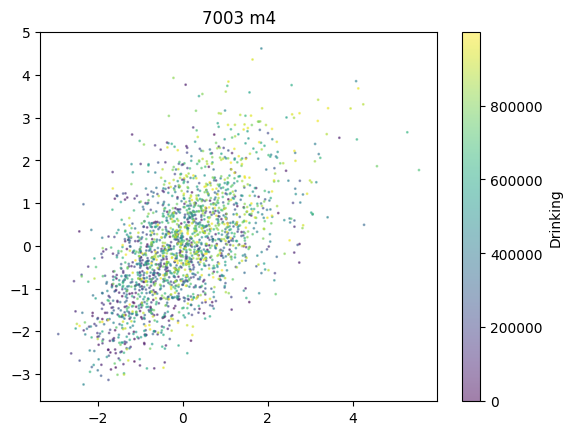

In [14]:
import matplotlib.colors as mcolors

binary_cmap = mcolors.ListedColormap(['blue', 'red'])
scatter = plt.scatter(X_c[:,0], Y_c[:,0], c=variable_colors, cmap='viridis', alpha=0.5, s=1)
plt.colorbar(scatter, label="Drinking")
plt.title(f"{mouse_id} {session_id}")


In [15]:
data.clusters[0]['spike_times'][-10:]

array([2657466.43333333, 2657728.56666667, 2657750.3       ,
       2657773.        , 2657861.93333333, 2657911.4       ,
       2657965.73333333, 2658099.13333333, 2658123.06666667,
       2658193.6       ])

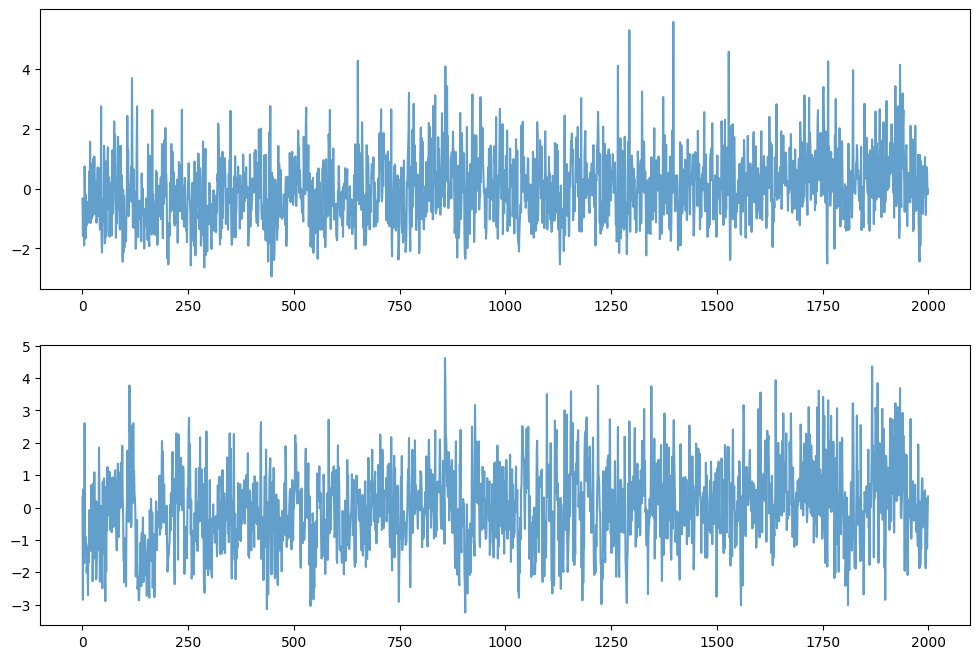

In [16]:
# X_c and Y_c are your canonical components from CCA
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot first few canonical components for both datasets

axes[0].plot(X_c[:, 0], label=f'X_canonical_{0+1}', alpha=0.7)
axes[1].plot(Y_c[:, 0], label=f'Y_canonical_{0+1}', alpha=0.7)

### Events

In [17]:
data.events

,trial_number,timestamp,poke_left,poke_right,centroid_x,centroid_y,target_cell,iti,water_left,water_right,reward_state,click,flip_state,speed,direction,drinking,timestamp_ms
0,0,2025-06-25 14:03:50.053529600,False,False,87,1059,12.0,False,True,False,False,False,False,0.000000,0.000000,False,19213
1,0,2025-06-25 14:03:50.088512000,False,False,87,1058,12.0,False,True,False,False,False,False,1.000000,1.570796,False,19247
2,0,2025-06-25 14:03:50.112576000,False,False,87,1058,12.0,False,True,False,False,False,False,0.000000,0.000000,False,19280
3,0,2025-06-25 14:03:50.133427200,False,False,86,1058,12.0,False,True,False,False,False,False,1.000000,0.000000,False,19313
4,0,2025-06-25 14:03:50.152921600,False,False,86,1058,12.0,False,True,False,False,False,False,0.000000,0.000000,False,19347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78961,45,2025-06-25 14:47:44.893299200,False,False,632,1682,NaN,False,True,False,False,False,False,2.236068,0.000015,False,2651239
78962,45,2025-06-25 14:47:44.997990400,False,False,632,1681,NaN,False,True,False,False,False,False,1.000000,1.570796,False,2651273
78963,45,2025-06-25 14:47:45.093145600,False,False,631,1681,NaN,False,True,False,False,False,False,1.000000,0.000000,False,2651306
78964,45,2025-06-25 14:47:45.193510400,False,False,629,1682,NaN,False,True,False,False,False,False,2.236068,0.000015,False,2651339


### Alignment Inspection

In [18]:
# from scipy.signal import decimate

# reward_path = f"S:/{experiment}/preprocessed/{mouse_id}/{session_id}/reward.npy"
# reward_raw = np.load(reward_path)
# reward_1khz = decimate(reward_raw, 30, ftype='iir', zero_phase=True)

In [19]:
# # Covert voltages to bool
# start = data.events['timestamp_ms'][0]
# reward_bool = np.zeros_like(reward_1khz)
# reward_idx = np.where(reward_1khz > 0)
# reward_bool[reward_idx] = 1
# reward_bool[:start+25000] = 0  # Clean up initial reward noise (find a clean solution for this)
# reward_transition = np.where(np.diff(reward_bool) == 1)[0]
# reward_transition[0] # First reward state transition

In [20]:
# # Preview reward state boolean
# plt.plot(reward_bool[:1000*250])
# plt.axvline(data.events['timestamp_ms'][0], color='r', linestyle='--')
# plt.axvline(reward_transition[0], color='g', linestyle='--')
# plt.title('Start of Video and First Reward')
# plt.show()

In [21]:
# # Pick a transition to check
# reward_state_transition = reward_transition[-1]
# print(reward_state_transition)

In [22]:
# # Check for reward state transition in events dataframe
# data.events[data.events['timestamp_ms'].between(reward_state_transition-120, reward_state_transition+120)]